In [1]:
#for some basic information
import numpy as np
import pandas as pd
import random
import joypy
from collections import Counter

In [2]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from pandas import plotting
from pandas.plotting import parallel_coordinates


In [3]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from bubbly.bubbly import bubbleplot


In [4]:
import os
print(os.listdir("../data_visualization/five_thirghty_eight"))

['56596_396588_bundle_archive.zip', 'dc-wikia-data.csv', 'marvel-wikia-data.csv', 'README.md']


In [87]:
dc=pd.read_csv("https://www.kaggle.com/fivethirtyeight/comments?select=dc-wikia-data.csv")
dc.head()

HTTPError: HTTP Error 404: Not Found

In [6]:
marvel=pd.read_csv("../data_visualization/five_thirghty_eight/marvel-wikia-data.csv")

In [7]:
marvel.head()

page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   Blue Eyes  Black Hair  Male Characters  NaN   
4     Good Characters   Blue Eyes  Blond Hair  Male Characters  NaN   

               ALIVE  APPEARANCES FIRST APPEARANCE    Year  
0  Living Characters       4043.0           Aug-62  1962.0  
1  Living Characters       3360.0           Mar-41  1941.0  
2  Living Characters       3061.0           Oct-74  1974.0  
3  Living Characters       2961.0           Mar-63  1963.0  
4  Living Characters       2258.0           Nov-50  1950.0

In [8]:
marvel.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [9]:
# imputing missing values
dc["ID"]=dc["ID"].fillna(dc["ID"].mode()[0])
dc['ALIGN'] = dc['ALIGN'].fillna(dc['ALIGN'].mode()[0])
dc['EYE'].fillna(dc['EYE'].mode()[0], inplace = True)
dc['HAIR'].fillna(dc['HAIR'].mode()[0], inplace = True)
dc['SEX'].fillna(dc['SEX'].mode()[0], inplace = True)
dc['ALIVE'].fillna(dc['ALIVE'].mode()[0], inplace = True)
dc['APPEARANCES'].fillna(dc['APPEARANCES'].mode()[0], inplace = True)
dc['FIRST APPEARANCE'].fillna(dc['FIRST APPEARANCE'].mode()[0], inplace = True)
dc['YEAR'].fillna(dc['YEAR'].mode()[0], inplace = True)

marvel['ID'] = marvel['ID'].fillna(marvel['ID'].mode()[0])
marvel['ALIGN'] = marvel['ALIGN'].fillna(marvel['ALIGN'].mode()[0])
marvel['EYE'].fillna(marvel['EYE'].mode()[0], inplace = True)
marvel['HAIR'].fillna(marvel['HAIR'].mode()[0], inplace = True)
marvel['SEX'].fillna(marvel['SEX'].mode()[0], inplace = True)
marvel['ALIVE'].fillna(marvel['ALIVE'].mode()[0], inplace = True)
marvel['APPEARANCES'].fillna(marvel['APPEARANCES'].mode()[0], inplace = True)
marvel['FIRST APPEARANCE'].fillna(marvel['FIRST APPEARANCE'].mode()[0], inplace = True)
marvel['Year'].fillna(marvel['Year'].mode()[0], inplace = True)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
dc["YEAR"]=dc["YEAR"].astype(int)
dc['APPEARANCES']=dc['APPEARANCES'].astype(int)


In [12]:
figure = bubbleplot(dataset = marvel, x_column = 'APPEARANCES', y_column = 'Year', 
    bubble_column = 'ALIVE',size_column = 'APPEARANCES', color_column = 'ALIVE',
    y_title = "Appearances", x_title = "Year", title = 'Year VS ALIGNMENT VS APPEARANCES',
    x_logscale = False, scale_bubble = 10, height = 650)
#py.iplot(figure,config={"scrollzoom":True})

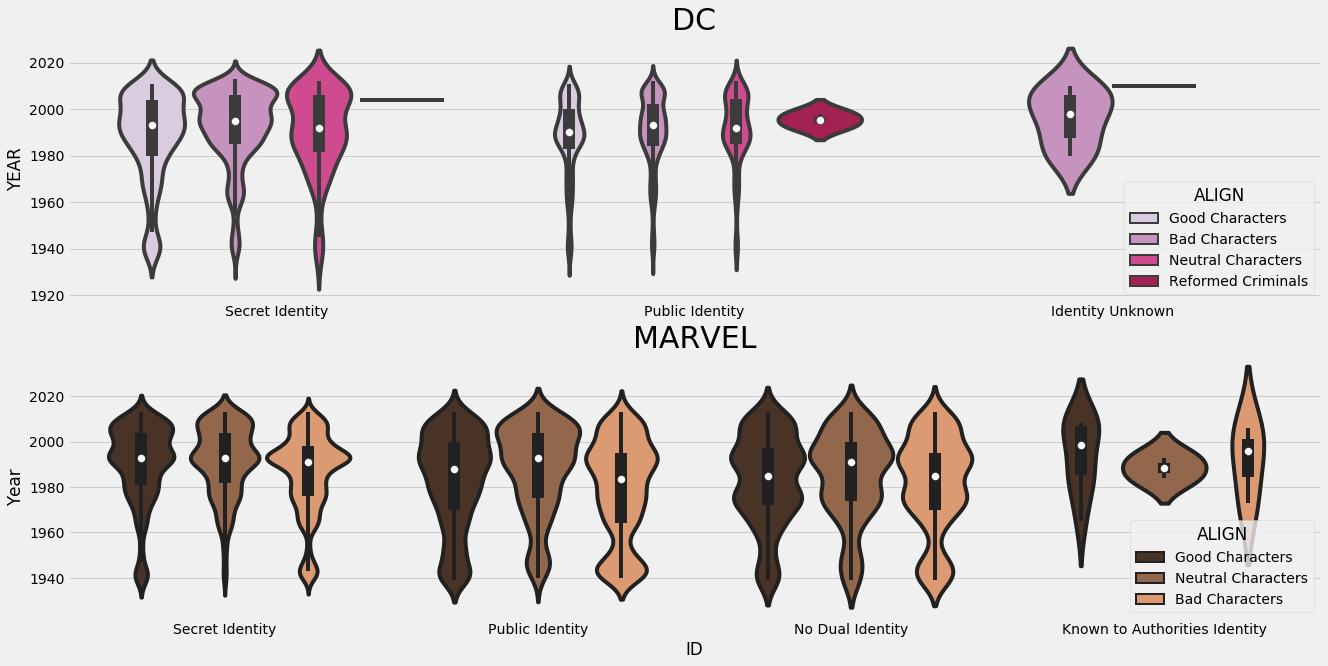

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(2,1,1)
sns.violinplot(dc["ID"], dc['YEAR'], hue = dc['ALIGN'],palette = 'PuRd')
plt.xlabel(" ")
plt.title("DC",fontsize=30)

plt.subplot(2,1,2)
sns.violinplot(marvel["ID"],marvel["Year"],hue=marvel["ALIGN"],palette="copper")
plt.title('MARVEL', fontsize = 30)
plt.show()

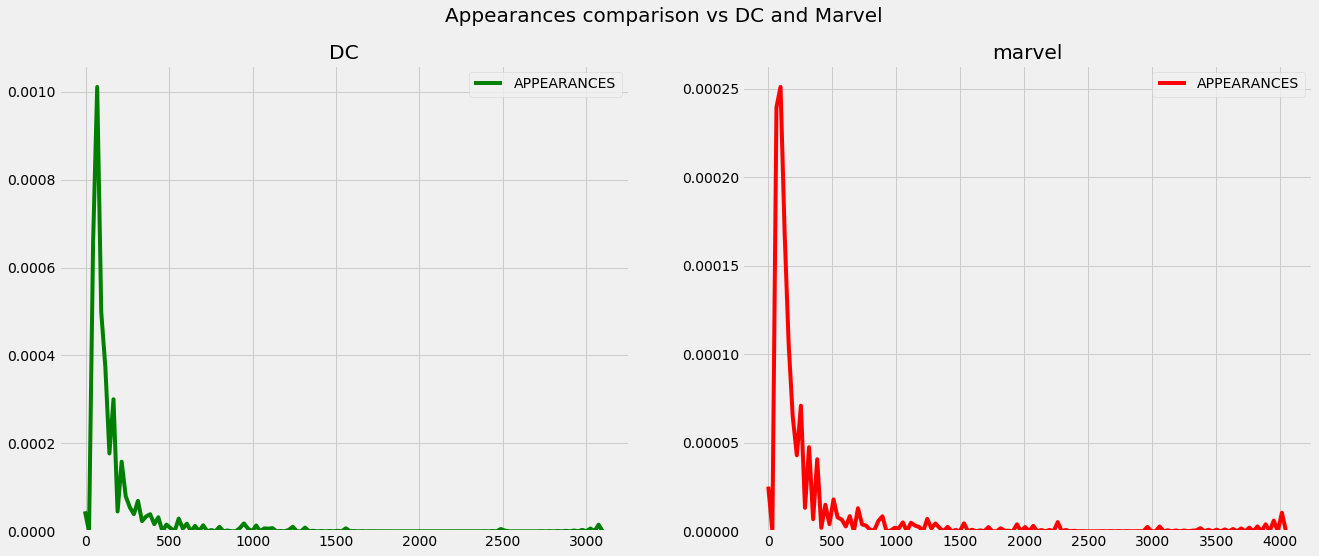

In [14]:
plt.rcParams["figure.figsize"]=(20,8)
plt.style.use("fivethirtyeight")

dc['APPEARANCES'].fillna(0, inplace = True)
marvel['APPEARANCES'].fillna(0, inplace = True)

import warnings
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.kdeplot(dc['APPEARANCES'],color="green")
plt.title("DC")

plt.subplot(1,2,2)
sns.kdeplot(marvel["APPEARANCES"],color="red")
plt.title("marvel")

plt.suptitle('Appearances comparison vs DC and Marvel', fontsize = 20)
plt.show()

In [15]:
trace1=go.Histogram(
        x=dc["ID"],
        name="DC",
        opacity=0.75,
        marker=dict(color="red")
        )
trace2=go.Histogram(x=marvel["ID"],name="marvel",opacity=0.75,marker=dict(color="blue"))
data = [trace1,trace2]

layout=go.Layout(barmode="group",title="comparison of identites")
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)


In [16]:
trace1=go.Scatter3d(
        x=dc["APPEARANCES"],
        y=dc["YEAR"],
        z=dc["ALIVE"],
        name="DC",
        mode="markers",
        marker=dict(color="blue"))

trace2=go.Scatter3d(
        x=marvel["APPEARANCES"],
        y=marvel["Year"],
        z=marvel["ALIVE"],
        name="marvel",
        mode="markers",
        marker=dict(size = 10,color="red"))
data=[trace1,trace2]
layout=go.Layout(
        title="character vs gender vs alive or not ",
        margin=dict(l=0,r=0,b=0,t=0))
fig=go.Figure(data=data,layout=layout) 
iplot(fig)

In [17]:
trace1=go.Box(
        x=dc["ALIGN"],
        y=dc["APPEARANCES"],
        name="dc",
        marker=dict(color="red"))

trace2=go.Box(
        x=marvel["ALIGN"],
        y=marvel["APPEARANCES"],
        name="marvel",
        marker=dict(color="blue"))
data=[trace1,trace2]
layout=go.Layout(boxmode="group",title="Character vs Apperences")
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [18]:
hair_dc=dc["HAIR"].value_counts()
hair_marvel=marvel["HAIR"].value_counts()

In [19]:
trace1=go.Bar(x=hair_dc.index,y=hair_dc.values,name="DC",marker=dict(color="red"))
trace2=go.Bar(x=hair_marvel.index,y=hair_marvel.values,name="marvel",marker=dict(color="blue"))
data=[trace1,trace2]
layout=go.Layout(barmode="relative",title="different hair colors of heroes")
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [20]:
hair_dc=dc["EYE"].value_counts()
hair_marvel=marvel["EYE"].value_counts()
trace=go.Bar(x=hair_dc.index,y=hair_dc.values,name="DC",marker=dict(color="red"))
trace2=go.Bar(x=hair_marvel.index,y=hair_marvel.values,name="Marvel",marker=dict(color="blue"))
data=[trace,trace2]
layout=go.Layout(barmode="relative",title="different eye color of super heroes")
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [26]:
gsm_dc=dc["GSM"].value_counts()
gsm_marvel=marvel["GSM"].value_counts()

label_dc=gsm_dc.index
size_dc=gsm_dc.values

label_marvel=gsm_marvel.index
size_marvel=gsm_marvel.values

colors=["aqua","gold"]
colors2=["pink","lightblue"]
trace=go.Pie(labels=label_dc,values=size_dc,marker=dict(colors=colors),name="DC",hole=0.3)
trace1 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)


data=[trace]
data2=[trace1]

layout1=go.Layout(title="sexual minority in dc")
layout2=go.Layout(title="sexual minority in marvel")

fig=go.Figure(data=data,layout=layout1)
fig2=go.Figure(data=data2,layout=layout2)

py.iplot(fig)
py.iplot(fig2)

In [33]:
align_dc=dc["ALIGN"].value_counts()
align_marvel=marvel["ALIGN"].value_counts()

trace1=go.Bar(x=align_dc.index,y=align_dc.values,name="DC",marker=dict(color="red"))
trace2=go.Bar(x=align_marvel.index,y=align_marvel.values,name="marvel",marker=dict(color="blue"))

data=[trace1,trace2]

layout=go.Layout(barmode="group",title="alignment of charcater",bargap=0.15,bargroupgap=0.1)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename="Alignment")

In [52]:
sex_count_dc=dc["SEX"].value_counts()
sex_count_marvel=marvel["SEX"].value_counts()

align1=go.Bar(x=sex_count_dc.index,y=sex_count_dc.values,marker=dict(color="red"))
align2=go.Bar(x=sex_count_marvel.index,y=sex_count_marvel,marker=dict(color="blue"))

data=[align1,align2]

layout1=go.Layout(barmode="group",title="Comparison of Gender in DC and Marvel")
figure=go.Figure(data=data,layout=layout1)
py.iplot(figure,filename="Gender")

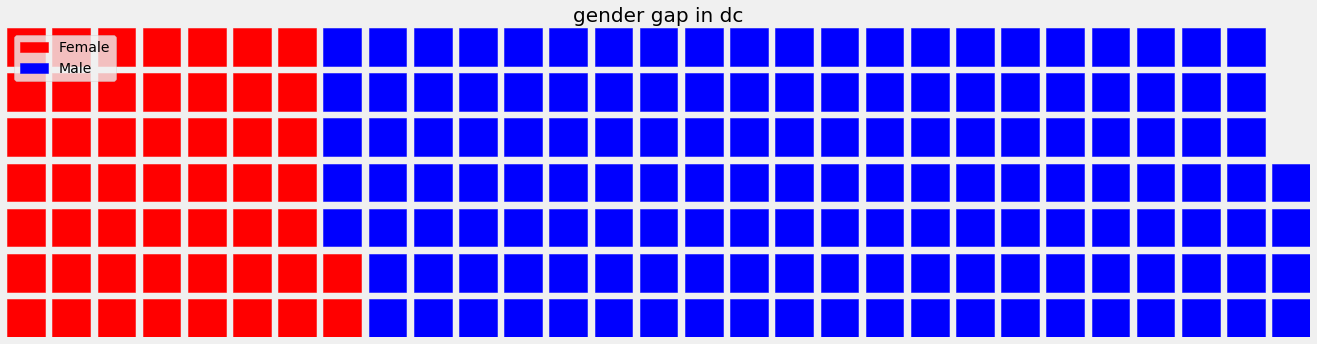

In [55]:
import warnings
warnings.filterwarnings("ignore")

df=dc.iloc[:200,:].groupby("SEX").size().reset_index(name="counts")
n_categories=df.shape[0]
colors=["red","blue"]

fig=plt.figure(FigureClass=Waffle,values=df["counts"],labels=["Female","Male"],legend={"loc":"upper left"},title={"label":"gender gap in dc","fontsize":20},
                  rows=7,colors=colors,figsize=(20,5))

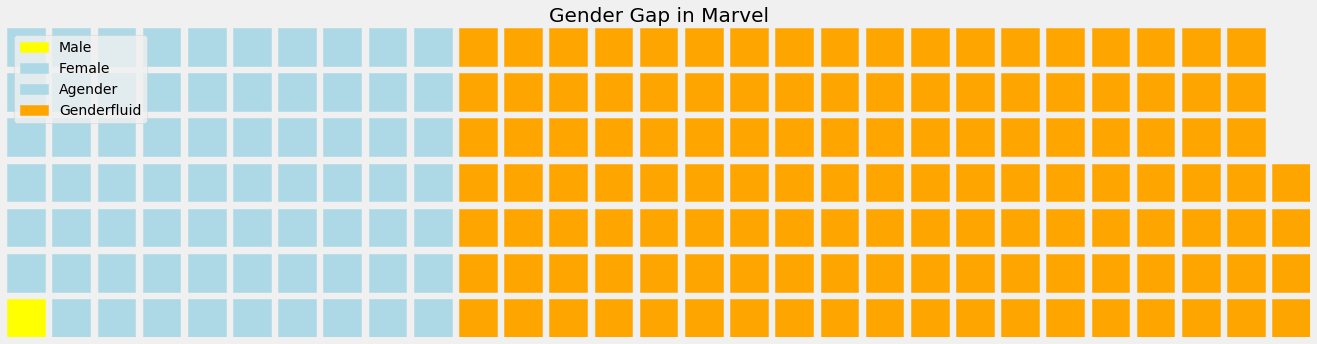

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Prepare Data
df = marvel.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = df.shape[0]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    values = df['counts'],
    labels = ['Male','Female','Agender', 'Genderfluid'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in Marvel', 'fontsize': 20},    
    rows=7,
    colors=['yellow','lightblue', 'lightblue','orange'],
    figsize = (20, 5)
)


In [59]:
marvel['comics'] = 'Marvel'
marvel = marvel.truncate(before=-1, after=15)
import networkx as nx
marvel = nx.from_pandas_edgelist(marvel, source='comics', target='name', edge_attr=True,)


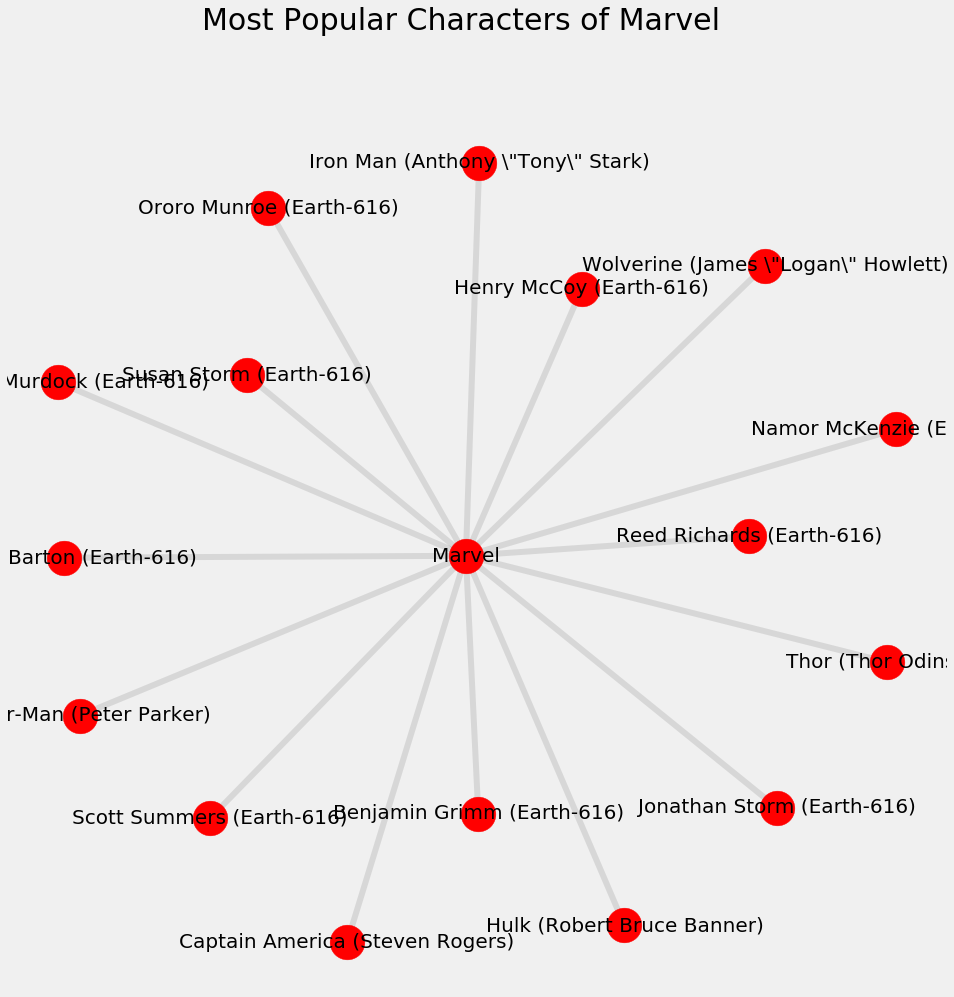

In [63]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of Marvel', fontsize = 30)

pos = nx.spring_layout(marvel)

nx.draw_networkx_nodes(marvel, pos, node_size = 1200, node_color = 'red')
nx.draw_networkx_edges(marvel, pos, width = 6, alpha = 0.1, edge_color = 'black')
nx.draw_networkx_labels(marvel, pos, font_size = 20, font_family = 'sans-serif')
plt.grid()
plt.axis('off')
plt.show()

In [67]:
dc['comics']= 'DC'
dc= dc.truncate(before=-1, after=15)

import networkx as nx
dc = nx.from_pandas_edgelist(dc, source='comics', target='name', edge_attr=True,)

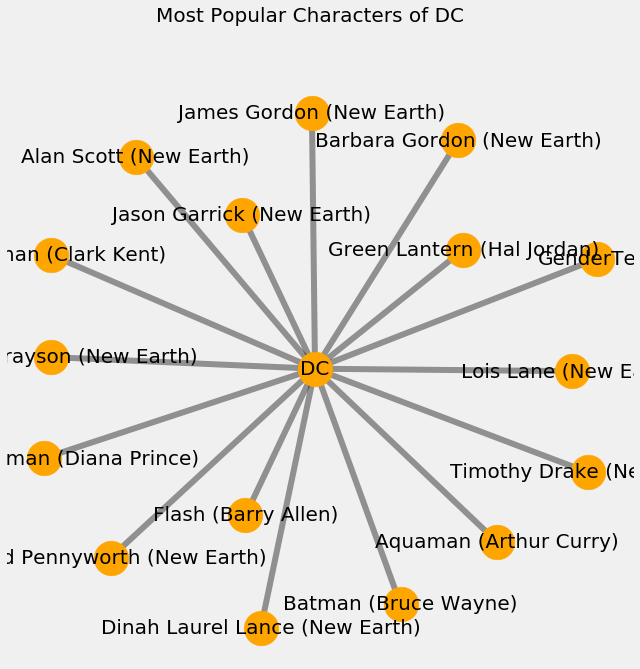

In [86]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (10, 10)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of DC', fontsize = 20)

pos = nx.spring_layout(dc)

# drawing nodes
nx.draw_networkx_nodes(dc, pos, node_size = 1200, node_color = 'orange')

# drawing edges
nx.draw_networkx_edges(dc, pos, width = 6, alpha = 0.4, edge_color = 'black')

# labels
nx.draw_networkx_labels(dc, pos, font_size = 20, font_family = 'sans-serif')

plt.grid()
plt.axis('off')
plt.show()

**The Top Characters from DC are Wonder Woman, Superman, Aquaman, Alan Scott, Green Lantern, Batman, Flash, Alfred pennyworth, Gordon, Richard Grayson, Dinah Laurel Lance, Barbara Gordon, Jaosn Garrick, Timothy Drake. **
**One Important finding is that there are so many characters from New Earth. There is a female character also in the list of Top 15 Most Popular Characters in the DC Universe whereas there no female character in the Marvel Universe.**